<a href="https://colab.research.google.com/github/gabrielrflopes/Churn_Prediction/blob/main/Previs%C3%A3o_de_Rotatividade_em_uma_Empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de Rotatividade (_Churn_) em uma Empresa de Telecomunicações

<p align=center>
<img src="https://raw.githubusercontent.com/gabrielrflopes/Churn_Prediction/main/capa_p4.png" width="60%"></p>

### O que é _Churn_?

No contexto de negócios, _Churn_ se trata da taxa de rotatividade da base de clientes. Ela calcula a evasão através da comparação entre o número de clientes no início e no final de um período. A fórmula para o cálculo é a seguinte:

$$ \text{Churn} = \frac{C_0 - C_f}{C_0} $$

em que $C_0$ é a quantidade de clientes no início do período e $C_f$ a quantidade ao final do mesmo período.

Empresas como Netflix e Spotify medem a rotatividade dos clientes de acordo com o número de cancelamentos de assinaturas, mas outras empresas investigam os clientes que foram para o competidor ou que deixaram de usar o produto ou serviços de uma vez.

Os impactos negativos da rotatividade são observados para além da perda de receita e fluxo de caixa. Como conquistar novos clientes é mais caro do que reter os antigos, é comum uma redução no lucro por causa do custo de aquisição de novos clientes.

Outro problema é a diminuição da reserva de mercado da empresa. Uma alta taxa de rotatividade aumenta as incertezas dos investidores, fazendo o valor de mercado cair. Além disso, a reputação da empresa pode ser prejudicada, caso a evasão esteja associada a uma má experiência do cliente.

Sendo assim, fica claro a relevância desse problema que muitos negócios enfrentam, e que muitos buscam solução justamente na construção de modelos que possam prever a rotatividade, diminuindo a taxa de _Churn_.

### Objetivos do Projeto

Neste projeto, queremos analisar um conjunto de dados que fornece _insights_ com relação à rotatividade numa empresa de Telecomunicações. Seguiremos os seguintes passos:

- Aquisição dos dados;
- Análise Exploratória dos dados;
- Preparação dos dados;
- Construção de modelos de _Machine Learning_ (ML);
- Otimização de hiperparâmetros;
- Conclusão.

Ao final, esperamos ter uma visão dos melhores modelos de ML para previsáo de rotatividade, considerando este estudo específico.

## Bibliotecas

**Importando bibliotecas de análise e visualização de dados**

In [ ]:
import numpy as np # Algebra linear e manipulação de arrays
import pandas as pd # Importação e processamento de dados
import matplotlib.pyplot as plt # Visualização de dados
from matplotlib.ticker import PercentFormatter # Especificar o formato dos ticks para porcentagem
import seaborn as sns # Visualização de dados

%matplotlib inline

# Cores para serem utilizadas nos plots
colors = ['#1f4287', '#21e6c1']
colors2 = ['#071a52', '#086972', '#17b978']

# Definindo estilos das visualizações
sns.set_style('whitegrid')

# Importar filtro de avisos
from warnings import simplefilter
# ignorar futuros avisos
simplefilter(action = 'ignore', category = FutureWarning)

**Importando bibliotecas de Machine Learning e métricas de desempenho**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler # Lidar com dados desbalanceados diminuindo a amostragem da classe majoritária

from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report # Métricas de avaliação dos modelos

from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, roc_curve # Visualização da matriz de confusão de da curva ROC

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder # Padronização de atributos e codificação de variáveis categóricas para o formato numérico, respectivamente

from sklearn.pipeline import make_pipeline # Biblioteca para construir uma pipeline com múltiplos passos de pré-processamento e modelagem de dados, simplificando o processo de construção e implementação de modelos de ML

from sklearn.model_selection import train_test_split # Dividir o conjunto de dados em subconjuntos de treino e teste, para avaliação do modelo em dados novos

from sklearn.model_selection import cross_val_score, cross_validate # Biblioteca para validação cruzada, avaliando a performance do modelo em múltiplos subconjuntos, trazendo mais robustez de performance

from sklearn.model_selection import StratifiedKFold, RepeatedKFold, KFold # Assegurar que cada dobra da validação cruzada mantenha a mesma distribuição de classes do dataset original

from sklearn.model_selection import GridSearchCV # Grid Search para explorar sistematicamente as diferentes combinações de hiperparâmetros para a melhor configuração do modelo

from sklearn.svm import SVC # Classificador de vetores de suporte, algoritmo de aprendizado supervisionado

from sklearn.linear_model import SGDClassifier # Classificador de descida de gradiente estocástico, algoritmo de classificação linear para datasets grandes

from sklearn.tree import DecisionTreeClassifier # Árvore de decisão, algoritmo de aprendizado supervisionado não-paramétrico para prever as classes através de regras de decisão

from sklearn.linear_model import LogisticRegression # Algoritmo de aprendizado supervisionado para classificação binária ou multi-classe, baseado em modelo estatístico

from xgboost import XGBClassifier # Classificador XGBoost, algoritmo de impulsionamento de gradiente otimizado

from sklearn.ensemble import RandomForestClassifier # Classificador de floresta aleatória, um método de aprendizagem conjunta que combina múltiplas árvores de decisão para melhorar a classificação

from lightgbm import LGBMClassifier # Classificador LightGBM, uma estrutura de impulsionamento de gradiente voltado para alta performance e eficiência em datasets grandes

## Importando o Conjunto de Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na plataforma de ensino da IBM Developer, e tratam de um problema típico de uma companhia de telecomunicações. O conjunto de dados completo pode ser encontrado [neste link](https://github.com/gabrielrflopes/Churn_Prediction/blob/main/Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Vamos importar os dados utilizando o método `read_csv()` do _Pandas_.

In [ ]:
data_path = 'https://raw.githubusercontent.com/gabrielrflopes/Churn_Prediction/main/Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv'

df = pd.read_csv(data_path)

## Análise Exploratória dos Dados

Para a análise exploratória, iremos:

- Visualizar as primeiras entradas, notando os diferentes tipos de cada variável;
- Visualizar as dimensões do _dataset_;
- Construir um dicionário de variáveis;
- Analisar a presença de valores ausentes;
- Checar a consistência dos dados para o tipo da variável.


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1542,9798-OPFEM,Female,0,No,No,46,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Electronic check,21.10,937.1,No
216,9286-BHDQG,Male,0,Yes,Yes,72,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Credit card (automatic),45.25,3139.8,No
5620,5286-YHCVC,Male,0,Yes,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),104.80,7470.1,No
2021,0181-RITDD,Male,0,Yes,Yes,62,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,108.15,6825.65,No
6167,3154-CFSZG,Male,0,Yes,Yes,47,Yes,No,Fiber optic,Yes,...,Yes,No,No,Yes,Month-to-month,No,Electronic check,90.05,4137.2,No


In [ ]:
print('Dimensões do Dataset')
print('Entradas:\t{}'.format(df.shape[0]),
      '\nVariáveis:\t{}'.format(df.shape[1]))

Dimensões do Dataset
Entradas:	7043 
Variáveis:	21


In [ ]:
print('Nomes das variáveis:\n',
      df.columns)

Nomes das variáveis:
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


### Dicionário de variáveis

O _dataset_ inclui informações a respeito de:

- Clientes que deixaram a empresa no último mês - `Churn`;
- Serviços que o cliente contratou - `phone`, `multiple lines`, `internet`, `online security`, `online backup`, `device protection`, `tech support`, `StreamingTV` e `StreamingMovies`;
- Informações sobre as contas dos clientes – `tenure` (i.e, tempo em meses que o cliente contrata os serviços), `contract`, `payment method`, `paperless billing`, `monthly charges`, `total charges`;
- Informações demográficas sobre os clientes – `gender`, `age range`, `partners`, `dependents`.

Acima, pudemos ter uma noção de como estão distribuídos os dados, com a dimensão do conjunto e os nomes das variáveis. Agora, vamos construir um dicionário de variáveis, juntamente com seus respectivos tipos.

Apesar de não haver um documento oficial para o significado das colunas, é muito fácil inferir através dos nomes.

In [ ]:
print('Tipos das variáveis\n')
df.dtypes

Tipos das variáveis



customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
print('Quantidade de cada tipo de variável')
print(df.dtypes.value_counts())

Quantidade de cada tipo de variável
object     18
int64       2
float64     1
dtype: int64


- Note que a coluna `TotalCharges` apresenta uma inconsistência entre a descrição e o tipo da variável (_object_). Espera-se que a quantidade total cobrada seja um valor numérico. Sendo uma _string_, isto pode indicar valores ausentes.

- A coluna `SeniorCitizen` é dada como numérica, porém ela contém valores binários de 0 e 1 que podem ser convertidos em uma variável categórica.

A partir dessa análise inicial, pôde-se constatar que:

- O conjunto de dados possui uma grande quantidade de variáveis categóricas que precisam ser codificadas para a construção dos modelos de ML;
- A variável `TotalCharges` precisa ser convertida de _string_ para _float64_, de modo a manter a consistência dos dados;
- A variável-alvo do problema é a coluna `Churn`, que apresenta duas classes: 'Yes' e 'No'.


### Limpeza dos dados

A seguir, vamos lidar com a conversão das variáveis com tipos inconsistentes, como `TotalCharges`, além de realizar a limpeza dos dados irrelevantes.

- A coluna `TotalCharges` está no formato _str_ provavelmente porque contém dados inexistentes de cobrança total para alguns clientes.

Ao tentar realizar a conversão para _float_, identificamos um erro que indica que algumas entradas de `TotalCharge` contém caracteres de espaço, lançados como dados ausentes.

In [ ]:
df.query('TotalCharges == " "')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Como podemos ver acima, são 11 entradas com espaços representando valores ausentes. O procedimento para lidar com este problema será a criação de uma função que recebe o atributo e aplica o método `pd.to_numeric()` com argumento _errors = 'coarce'_, que substitui qualquer erro levantado por valores _NaN_.

- **Converter a coluna `TotalCharges` para _float64_**

In [ ]:
# Função para converter string para float
def converter(feature):
  df[feature] = pd.to_numeric(df[feature], errors = 'coerce')
  return df[feature]

# Converter a coluna TotalCharges para float
converter('TotalCharges')

print('Coluna TotalCharges convertida para o formato', df['TotalCharges'].dtypes)

Coluna TotalCharges convertida para o formato float64


Com a coluna convertida para o formato _float64_, podemos substituir os valores ausentes, inseridos pela função, pela mediana do atributo, mantendo assim a informação das entradas.

- **Lidando com os valores ausentes em `TotalCharges`**

In [ ]:
# Criar um DataFrame de backup
df_clean = df.copy()

# Calcular a mediana da variável TotalCharges
total_charges_median = df.loc[df['TotalCharges'] != ' ']['TotalCharges'].median()

# Verificar os valores ausentes incluídos em TotalCharges
print('Valores ausentes antes:', df['TotalCharges'].isna().sum())

# Substituir os valores NaN pela mediana da coluna
df_clean['TotalCharges'].replace(np.nan, total_charges_median, inplace = True)

# Checar se foram substituídos corretamente
print('Valores ausentes após:', df_clean['TotalCharges'].isna().sum())

Valores ausentes antes: 11
Valores ausentes após: 0


- **Convertendo a coluna `SeniorCitizen`para categórica**

Com os valores ausentes resolvidos, iremos realizar a conversão da coluna `SeniorCitizen` para o formato _object_.

In [ ]:
df_clean['SeniorCitizen'].replace({0: 'No', 1: 'Yes'}, inplace = True)

print('Coluna SeniorCitizen convertida para o formato', df_clean['SeniorCitizen'].dtypes)

Coluna SeniorCitizen convertida para o formato object


- **Removendo a coluna `CustomerID`**

Por fim, iremos remover a coluna `CustomerID`, visto que ela não servirá nenhum propósito de análise neste projeto.

In [ ]:
df_clean.drop('customerID', axis = 1, inplace = True)

Agora, temos um _dataset_ mais limpo, sem valores ausentes e com todos os atributos nos formatos corretos.

In [ ]:
df_clean.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Preparação dos Dados

Nesta etapa de preparação dos dados, queremos adequar as variáveis ao formato codificado que torna possível a interpretação por parte dos algoritmos de ML. Para isto, iremos utilizar de uma técnica de codificação de variáveis categóricas presentes no _Scikit-learn_, o **Label Encoder**. Além dele, também iremos utilizar o método `pd.get_dummies` para transformar variáveis que não são binárias em atributos binários independentes, derivados das categorias de cada atributo original.

### Codificação das variáveis categóricas

- **Máscaras para variáveis categóricas a numéricas**

In [ ]:
bin_var = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist() # Variáveis binárias

numerical_var = [col for col in df_clean.select_dtypes(['int', 'float']).columns.tolist() if col not in bin_var] # Variáveis numéricas

categorical_nb = [col for col in df_clean.columns.tolist() if col not in bin_var + numerical_var] # Variáveis categóricas que não são binárias

In [ ]:
df_proc = df_clean.copy() # Criar uma cópia para o DataFrame processado

- **Codificando as variáveis binárias**

In [ ]:
le_gnd = LabelEncoder()

df_proc['gender'] = le_gnd.fit_transform(df['gender'])

le = LabelEncoder()

for i in bin_var:
  df_proc[i] = le.fit_transform(df_clean[i])

df_proc[bin_var]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,0,0,1,0,0,1,0
1,1,0,0,0,1,0,0
2,1,0,0,0,1,1,1
3,1,0,0,0,0,0,0
4,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,0
7039,0,0,1,1,1,1,0
7040,0,0,1,1,0,1,0
7041,1,1,1,0,1,1,1


In [ ]:
print('Classes na coluna gênero:',
      '\n0:', le_gnd.classes_[0],
      '\n1:', le_gnd.classes_[1])

print('\nDemais classes:',
      f'\n0: {le.classes_[0]}',
      f'\n1: {le.classes_[1]}')

Classes na coluna gênero: 
0: Female 
1: Male

Demais classes: 
0: No 
1: Yes


- **Codificando as variáveis categóricas que não são binárias**


In [ ]:
df_proc = pd.get_dummies(df_proc, columns = categorical_nb)

df_proc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


## Visualização dos Dados

### Correlação das variáveis com o alvo

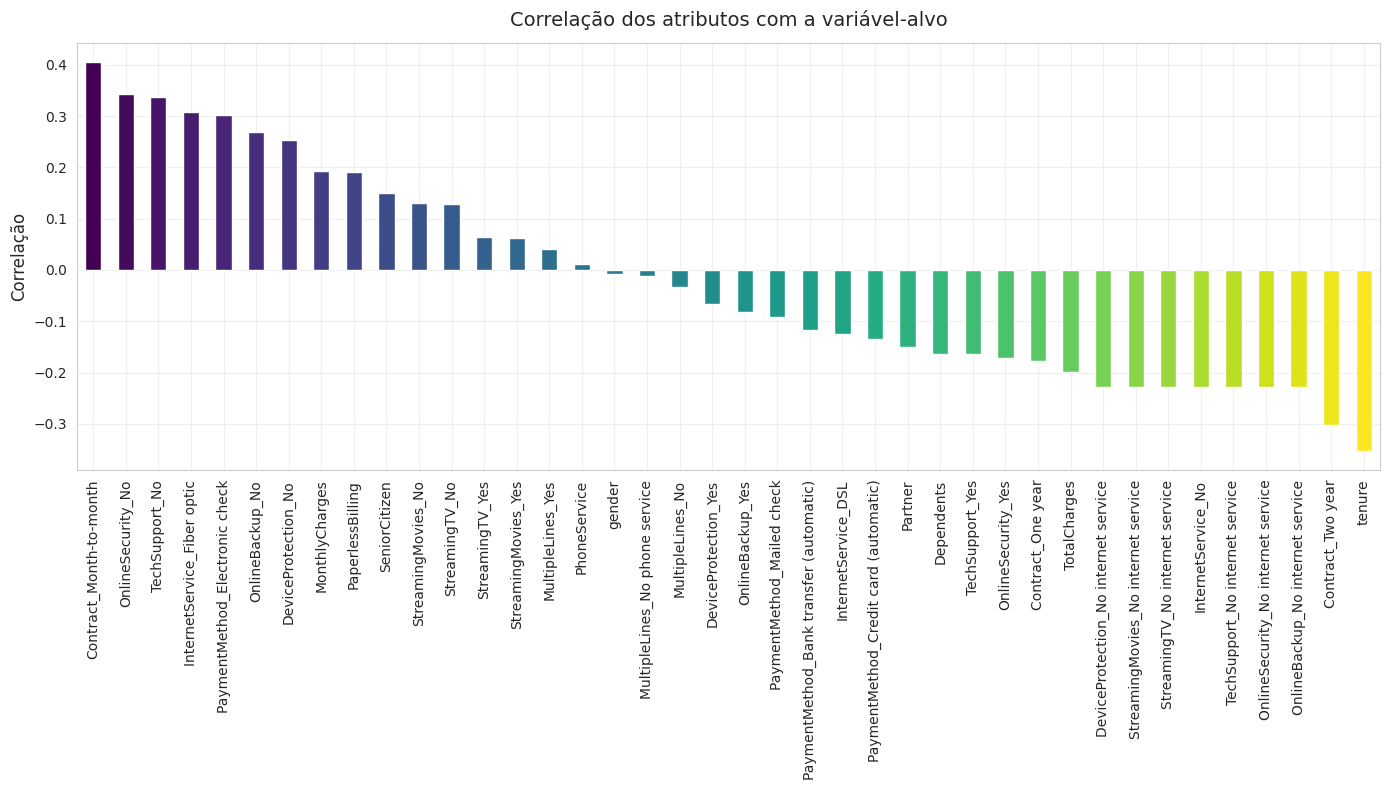

In [ ]:
corr = df_proc.corr()['Churn'].sort_values(ascending = False) # Definir correlações entre os atributos do DataFrame processado com relação ao alvo

fig, ax = plt.subplots(figsize = (14, 8))

cmap = plt.colormaps.get_cmap('viridis')

colors = np.linspace(0, 1, len(corr) - 1)

corr[1:].plot(kind = 'bar', color = cmap(colors))

ax.set_ylabel('Correlação', fontsize = 12)
ax.set_title('Correlação dos atributos com a variável-alvo', fontsize = 14, pad = 12)
ax.grid(alpha = .3)

fig.tight_layout()
fig.show()

O gráfico acima mostra a correlação dos atributos com relação à variável-alvo (_Churn_). De acordo com essa análise, os 5 atributos que influenciam positivamente, ou seja, que aumentam as chances de haver rotatividade, são:

1. Contrato de mês a mês;
2. Falta de segurança online;
3. Falta de suporte tecnológico;
4. Serviço de Internet de fibra óptica;
5. Método de pagamento de cheque eletrônico.

Os 5 atributos que influenciam negativamente, diminuindo a propensão à rotatividade, em direção à retenção do cliente, são:

1. Tempo de permanência com a empresa (_tenure_);
2. Contrato de dois anos;
3. Não ter serviços de Internet;
4. Cobranças totais;
5. Contrato de um ano.

Essa análise ajuda a identificar os atributos mais significativos, além de guiar na visualização desses dados antes de alimentar os modelos de aprendizado.

### Relação das variáveis binárias com a rotatividade

In [ ]:
def binary_plot(hue_churn = True):

  if hue_churn == False:

    colors = ['#1f4287', '#21e6c1']

    fig, ax = plt.subplots(figsize = (6, 4))

    countplot = sns.countplot(df_clean, x = 'Churn', hue = 'gender', ax = ax, palette = colors)

    ax.set_ylabel('# de Clientes', fontsize = 12, labelpad = 12)
    ax.set_xlabel('Churn', fontsize = 12)
    ax.grid(alpha = .3)

    # Modificar as legendas
    countplot.legend(title = 'Gênero')

    legend_labels = ['F', 'M']

    for t, l in zip(countplot.legend_.texts, legend_labels):
      t.set_text(l)

    fig.tight_layout()
    fig.show()

  if hue_churn == True:

    fig, ax = plt.subplots(2, 2, figsize = (10, 6))
    ax = ax.flatten()

    for i in np.arange(2, 6):

      xi = df_clean[bin_var].columns[i]

      countplot_2 = sns.countplot(df_clean, x = xi, hue = 'Churn', ax = ax[i - 3], order = ['No', 'Yes'], palette = 'rocket')

      ax[i - 3].set_ylabel('# de clientes', fontsize = 12, labelpad = 12)
      ax[i - 3].set_xticklabels(['Não', 'Sim'])
      ax[i - 3].grid(alpha = .3)

      ax[0].set_xlabel('Parceiro', fontsize = 12)
      ax[1].set_xlabel('Dependentes', fontsize = 12)
      ax[2].set_xlabel('Serviço de telefone', fontsize = 12)
      ax[3].set_xlabel('Conta sem papel', fontsize = 12)

      legend_labels = ['Não', 'Sim']

      for t, l in zip(countplot_2.legend_.texts, legend_labels):
        t.set_text(l)

      fig.tight_layout()
      fig.show()

- **Taxa de rotatividade por gênero**

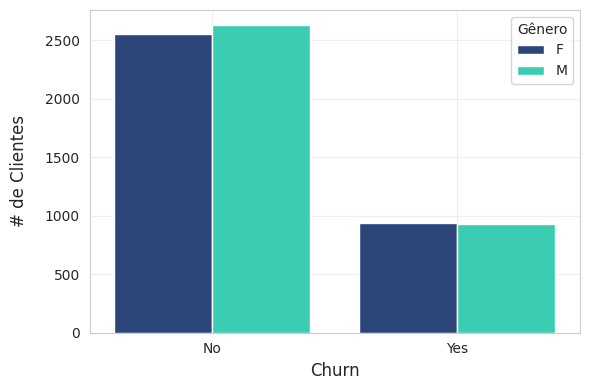

In [ ]:
binary_plot(hue_churn = False)

- Nota-se que a variável referente ao gênero dos clientes contribui pouco para a previsão de rotatividade. As taxas se mantém iguais para ambos os sexos, acompanhando a proporção de _Churn_ observada no _dataset_.

- **Rotatividade com relação a parceiros, dependentes, serviço de telefone e conta por papel**

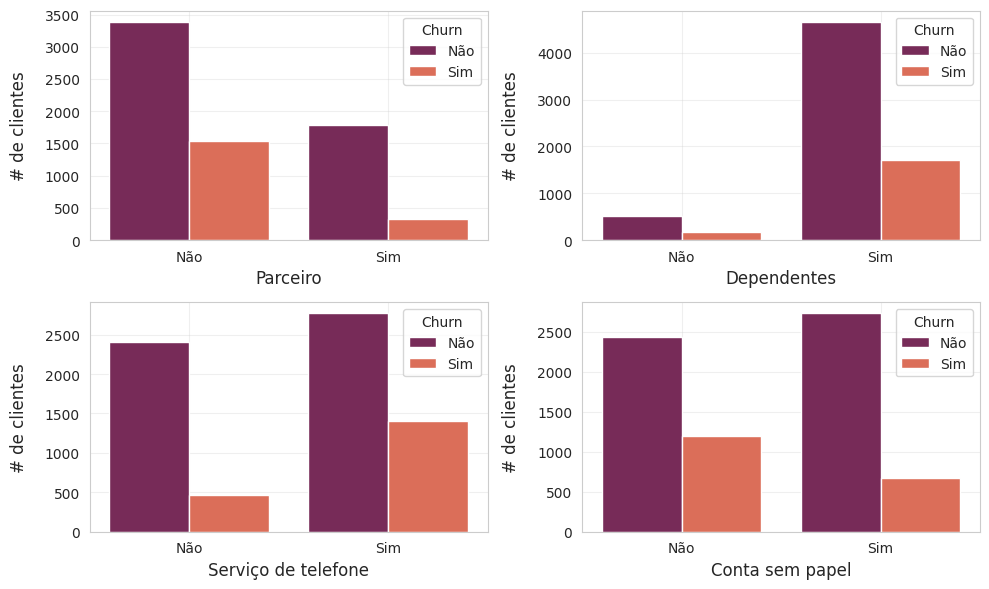

In [ ]:
binary_plot(hue_churn = True)

- No primeiro gráfico superior, é possível inferir que os clientes que têm parceiros são menos propensos a deixar a empresa. Se olharmos apenas esse indicador, o cliente com um parceiro tem 5 vezes mais chance de ser retido.

- No segundo gráfico superior, nota-se que ter dependentes (_e.g_ filhos) está relacionado tanto à permanência quanto à rotatividade. Proporcionalmente, clientes com dependentes tem mais chance de serem retidos.

- No primeiro gráfico inferior, o serviço de telefone influencia na rotatividade, aumentando a taxa em aproximadamente 3 vezes. Porém, ao analisar a correlação com a variável-alvo, no início dessa seção, vemos que esse atributo parece ser pouco relacionado à probabilidade de haver rotatividade.

- No segundo gráfico inferior, vemos que o efeito de cobranças digitais tem grande influencia na rotatividade, diminuindo a taxa positiva (_Churn_) e aumentando a negativa (Permanência).

### Relação da rotatividade com a fidelidade dos clientes

- **Permanência dos clientes em meses (_tenure_)**

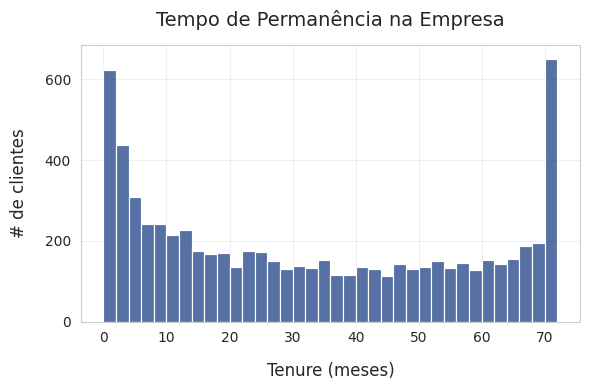

In [ ]:
fig, ax = plt.subplots(figsize = (6, 4))

colors = ['#1f4287', '#21e6c1']

sns.histplot(df_clean['tenure'], bins = 36, color = colors[0], ax = ax);

ax.set_xlabel('Tenure (meses)', fontsize = 12, labelpad = 12)
ax.set_ylabel('# de clientes', fontsize = 12, labelpad = 12)
ax.set_title('Tempo de Permanência na Empresa', fontsize = 14, pad = 14)
ax.set_yticks([0, 200, 400, 600])
ax.grid(alpha = .3)

fig.tight_layout()
fig.show()

- O gráfico de permanência acima mostra uma grande quantidade de clientes com poucos meses na empresa, que logo cai e se normaliza por volta de 18 meses. Note que existe uma parcela significativa de clientes que estão na empresa há mais de 70 meses.

- **Permanência por tipos de contratos**

In [ ]:
contract_monthly = df_clean.loc[df_clean['Contract'] == 'Month-to-month']['tenure']

contract_annual = df_clean.loc[df_clean['Contract'] == 'One year']['tenure']

contract_biannual = df_clean.loc[df_clean['Contract'] == 'Two year']['tenure']

contract_tenure = [contract_monthly, contract_annual, contract_biannual]

In [ ]:
def contract_tenure_plot(all_contracts = True):

  fig, ax = plt.subplots(1, 3, figsize = (14, 4))

  for i in range(3):

    labels = ['Mês a mês', 'Anual', 'Bianual']

    sns.histplot(contract_tenure[i], kde = True, bins = 36, color = colors2[i], label = labels[i], ax = ax[i])

    ax[0].set_ylabel('# de Clientes', fontsize = 12)
    ax[i].set_ylim(0, 875)
    ax[i].legend( )
    ax[i].set_xlabel('Tenure (meses)', fontsize = 12)
    ax[i].set_yticks([0, 200, 400, 600, 800])
    ax[i].grid(alpha = .3)

    if 0 < i <= 3:
      ax[i].set_ylabel('', labelpad = 12)

    fig.suptitle('Permanência por tipo de contrato', fontsize = 14)
    fig.tight_layout()
    fig.show()

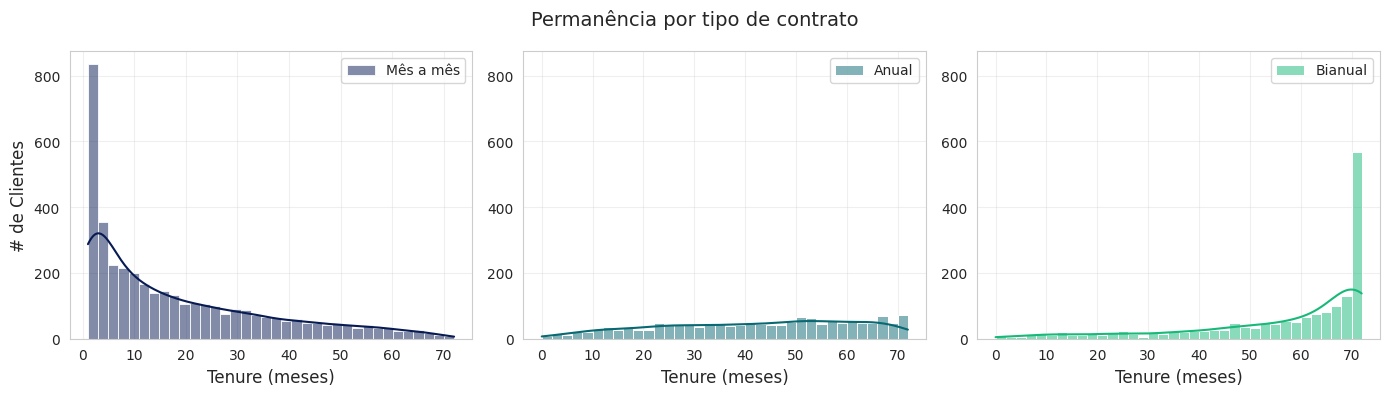

In [ ]:
contract_tenure_plot()

Os gráficos acima mostram os tipos de contratos escolhidos pelos clientes de acordo com o tempo de permanência na empresa.

- No primeiro gráfico, nota-se que a maioria dos clientes que escolhem o contrato mensal estão com a empresa a menos de 6 meses. À medida que o cliente se fideliza, ele tende a progredir para contratos mais duradouros. A maioria dos contratos mensais duram em média dois meses.

- No contrato anual, a busca é menor e mais uniformemente distribuída, porém nota-se que sua procura aumenta à medida que o tempo de permanência na empresa aumenta.

- O contrato de dois anos mostra que a maior procura são dos clientes mais fiéis, que estão há mais de 50 meses com a empresa. Quem escolhe esse tipo de contrato, tende a ficar por mais tempo.

### Rotatividade por tipo de contrato

In [ ]:
contract_df = df_clean.groupby(['Contract','Churn']).size().unstack()

pct_contract_churn = contract_df.T / contract_df.T.sum() * 100

pct_contract_churn.T

Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


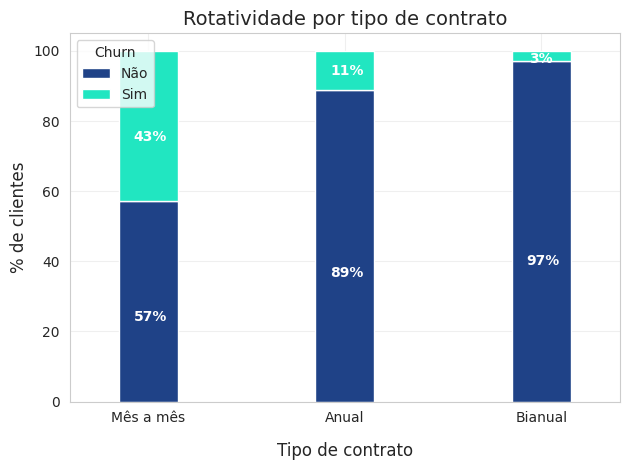

In [ ]:
fig, ax = plt.subplots()

plot = pct_contract_churn.T.plot(kind = 'bar', stacked = True, rot = 0, width = 0.3, color = colors, ax = ax)

ax.set_xlabel('Tipo de contrato', fontsize = 12, labelpad = 12)
ax.set_ylabel('% de clientes', fontsize = 12)
ax.set_title('Rotatividade por tipo de contrato', fontsize = 14)
ax.set_xticklabels(['Mês a mês', 'Anual', 'Bianual'])
ax.grid(alpha = .3)

legend_labels = ['Não', 'Sim']

for t, l in zip(plot.legend_.texts, legend_labels):
  t.set_text(l)

for p in ax.patches:

  width, height = p.get_width(), p.get_height()
  x, y = p.get_xy()

  if (y < 97.1681):
    ax.annotate('{:.0f}%'.format(height), (x + .25 * width, y + .4 * height), color = 'white', weight = 'bold')

  else:
    ax.annotate('{:.0f}%'.format(height), (x + .3 * width, y -.2 * height), color = 'white', weight = 'bold')

fig.tight_layout()
fig.show()

- A partir do gráfico acima, vemos mais claramente que o tipo de contrato influencia muito na decisão do cliente por deixar ou não a empresa. Dos clientes com contratos de dois anos, a taxa de rotatividade é de menos de 3%, comparados com os 43% de rotatividade nos clientes com contratos mensais.

Evidencia-se, portanto, a relação entre fidelidade, através de maior permanência na empresa, com a baixa propensão à rotatividade.

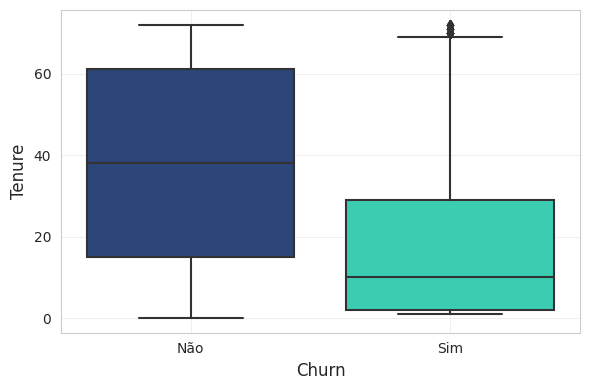

In [ ]:
fig, ax = plt.subplots(figsize = (6, 4))

sns.boxplot(df_clean, x = 'Churn', y = 'tenure', palette = colors)

ax.set_yticks([0, 20, 40, 60])
ax.set_xticklabels(['Não', 'Sim'])
ax.set_ylabel('Tenure', fontsize = 12)
ax.set_xlabel('Churn', fontsize = 12)
ax.grid(alpha = .3)

fig.tight_layout()
fig.show()

In [ ]:
print('Churn = 0\n', df_clean[df_clean['Churn'] == 'No']['tenure'].describe())
print('\n', '-' * 20, '\n')
print('Churn = 1\n', df_clean[df_clean['Churn'] == 'Yes']['tenure'].describe())

Churn = 0
 count    5174.000000
mean       37.569965
std        24.113777
min         0.000000
25%        15.000000
50%        38.000000
75%        61.000000
max        72.000000
Name: tenure, dtype: float64

 -------------------- 

Churn = 1
 count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64


- O _boxplot_ ajuda-nos a visualizar as diferenças estatísticas entre os casos de rotatividade com relação à variável _tenure_. Mais uma vez, vemos que clientes com mais tempo na empresa estão menos propensos a deixá-la, enquanto que 50% dos clientes deixam a empresa em até 10 meses, observando-se a mediana.

### Relação entre cobranças e a rotatividade

- **Cobranças mensais e Rotatividade**

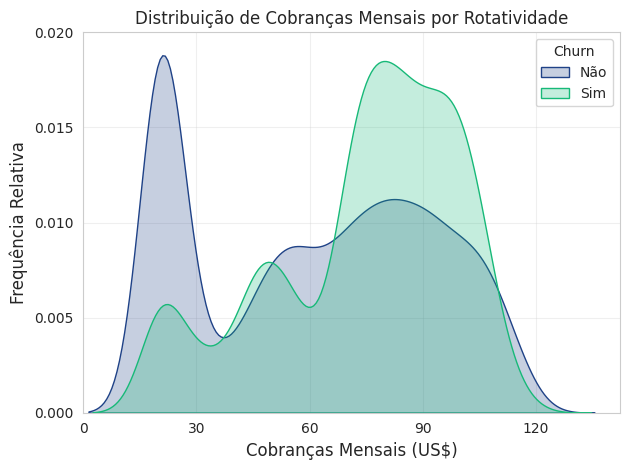

In [ ]:
fig, ax = plt.subplots()

sns.kdeplot(df_clean['MonthlyCharges'][df_clean['Churn'] == 'No'], color = colors[0], fill = True, ax = ax)
sns.kdeplot(df_clean['MonthlyCharges'][df_clean['Churn'] == 'Yes'], color = colors2[2], fill = True, ax = ax)

ax.set_ylabel('Frequência Relativa', fontsize = 12)
ax.set_xlabel('Cobranças Mensais (US$)', fontsize = 12)
ax.set_yticks([0, 0.005, 0.01, 0.015, 0.02])
ax.set_xticks([0, 30, 60, 90, 120])
ax.set_xlim(0,)
ax.set_title('Distribuição de Cobranças Mensais por Rotatividade')
ax.grid(alpha = .3)

ax.legend(title = 'Churn', labels = ['Não', 'Sim'])

fig.tight_layout()
fig.show()

Nota-se que:

- A taxa de rotatividade aumenta à medida que as cobranças mensais aumentam de valor;

- Para cobranças mensais menores que US$ 30, a chance do cliente deixar a empresa se reduz muito.

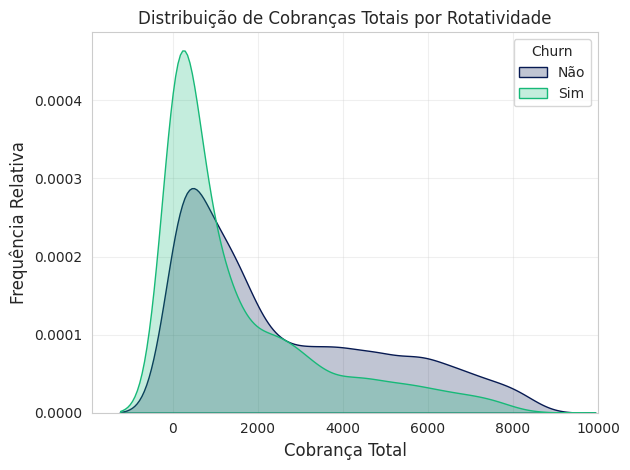

In [ ]:
fig, ax = plt.subplots()

plot_1 = sns.kdeplot(df_clean['TotalCharges'][df_clean['Churn'] == 'No'], fill = True, color = colors2[0], ax = ax)
plot_2 = sns.kdeplot(df_clean['TotalCharges'][df_clean['Churn'] == 'Yes'], fill = True, color = colors2[2], ax = ax)

ax.legend(title = 'Churn', labels = ['Não', 'Sim'])
ax.set_title('Distribuição de Cobranças Totais por Rotatividade')
ax.set_xlabel('Cobrança Total', fontsize = 12)
ax.set_ylabel('Frequência Relativa', fontsize = 12)
ax.grid(alpha = .3)

ax.set_xlim(-1.9e3, 1e4)

fig.tight_layout()
fig.show()

- Por essa análise, vemos que há maior rotatividade para cobranças totais menores. Uma hipótese do porquê isso acontece é devido ao fato de muitos clientes deixarem a empresa em pouco tempo (média de 18 meses), de modo que a soma total das cobranças seja naturalmente menor.

## Resumo da Análise Exploratória

Em busca de entender melhor como os dados apontam para as previsões de rotatividade, a análise exploratória visou identificar as distribuições dos dados para cada atributo e como eles se relacionam entre si e, principalmente, com a variável-alvo (_Churn_).

- A correlação entre as variáveis mostrou os atributos que se relacionam positiva e negativamente com o alvo, apontando uma tendência do cliente sair da empresa ou ser retido, respectivamente;

- Entre os atributos mais informativos dessa correlação, destacam-se o contrato mensal influenciando positivamente, e o tempo de permanencia na empresa, influenciando negativamente (menos propensão ao _Churn_);

- A falta de suporte técnico com relação a serviços de tecnologia e Internet são outros pontos que aumentam a tendência à rotatividade. Por outro lado, clientes que não contratam serviços de Internet ou que têm contratos mais duradouros, tendem a ficar na empresa;

- Nos dados demográficos, vimos que se o cliente têm parceiros e dependentes, o risco de _Churn_ diminui. Clientes que recebem a conta digitalmente também são menos propensos à rotatividade.

- Com relação ao tempo de permanência na empresa, vimos que, à medida em que se aumenta a fidelidade, por meio de contratos mais longos, as taxas de rotatividade caem abruptamente.

- Em média, perde-se mais clientes com contratos mensais. A média de permanência dos clientes com rotatividade é de 18 meses.

- Cobranças mensais altas aumentam a propensão à rotatividade, enquanto que as cobranças totais não são muito informativas.

## Construção dos Modelos de Machine Learning

### Balanceamento dos Dados

Espera-se que os casos de rotatividade sejam menos frequentes do que os casos de retenção de clientes. Vamos visualizar o desbalanceamento dos dados para começar a tratar desse problema no _dataset_.

In [ ]:
churn_count = df_proc['Churn'].value_counts() * 100 / df_proc['Churn'].value_counts().sum()

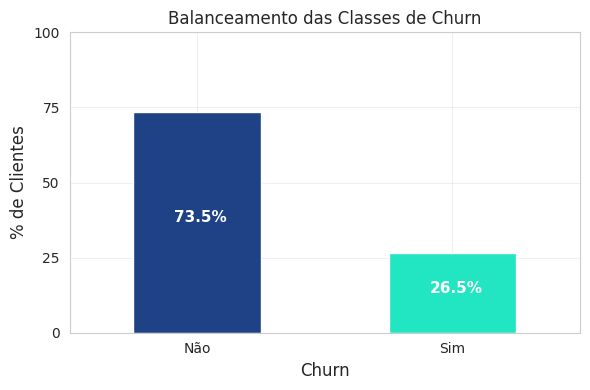

In [ ]:
fig, ax = plt.subplots(figsize = (6, 4))

churn_count.plot(kind = 'bar', color = colors, ax = ax, rot = 0)

ax.set_xticklabels(['Não', 'Sim'])
ax.grid(alpha = .3)
ax.set_ylabel('% de Clientes', fontsize = 12)
ax.set_xlabel('Churn', fontsize = 12)
ax.set_yticks([0, 25, 50, 75, 100])
ax.set_title('Balanceamento das Classes de Churn')

for p in ax.patches:

  width, height = p.get_width(), p.get_height()
  x, y = p.get_xy()

  ax.annotate('{:.1f}%'.format(height), (x + .32 * width, y + height/2), color = 'white', fontweight = 'bold', fontsize = 11)

fig.tight_layout()
fig.show()

- De fato, os clientes classificados com _Churn_ representam um quarto apenas do conjunto de dados.

- Para evitar problemas com enviesamento dos modelos para a classe majoritária, será realizado o balanceamento das classes para os dados de treinamento.

In [ ]:
# Divisão entre matriz de features e variável-alvo
X = df_proc.drop('Churn', axis = 1)
y = df_proc['Churn']

# Divisão entre conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15)

In [ ]:
print('Dimensões dos datasets de treino e teste',
      '\nX_train:', X_train.shape,
      '\ny_train:', y_train.shape,
      '\nX_test:\t', X_test.shape,
      '\ny_test:\t', y_test.shape)

Dimensões dos datasets de treino e teste 
X_train: (5986, 40) 
y_train: (5986,) 
X_test:	 (1057, 40) 
y_test:	 (1057,)


Para este projeto, iremos utilizar o método de _undersampling_ para o balanceamento das classes da variável-alvo. A escolha decorre do fato de haver exemplos suficientes na classe de _Churn_ positivo - que corresponde a 26,5% dos exemplos - não havendo necessidade de gerar exemplos artificialmente por meio de alguma técnica de _oversampling_. Obviamente, há um _trade-off_ envolvido nessa escolha, uma vez que toda técnica de _undersampling_ gera uma perda de informações do conjunto de dados.

Estes dados balanceados serão usados apenas para treino dos modelos. O teste sobre o modelo final será feito com dados novos armazenados em *X_test* e *y_test*.

- **Padronização das variáveis contínuas**

Com relação ao conjunto de treino, iremos padronizar as variáveis contínuas, de modo que elas mantenham a mesma distribuição, mas tenham média zero e desvio-padrão unitário.

No caso, temos a maioria das variáveis binárias (0 ou 1) que não precisaram passar por uma padronização. Iremos aplicar o `StandardScaler` apenas às variáveis contínuas do tipo _float_: `tenure`, `MonthlyCharges` e `TotalCharges`.

In [ ]:
std = StandardScaler()

cols_to_std = ['tenure', 'MonthlyCharges', 'TotalCharges']

X_train[cols_to_std] = std.fit_transform(X_train[cols_to_std])

X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4808,0,0,0,0,0.890587,1,0,0.535484,0.907122,1,...,0,0,1,0,0,1,0,0,1,0
3616,0,1,1,0,1.502620,1,0,0.759056,1.688170,1,...,0,0,1,0,1,0,0,1,0,0
6048,1,1,1,0,-0.129468,1,1,0.997644,0.174700,0,...,0,0,1,1,0,0,0,0,1,0
4404,1,0,0,0,-0.333479,1,1,0.834136,-0.032841,1,...,0,0,1,1,0,0,0,0,1,0
1772,1,0,0,0,-1.231128,1,0,0.482094,-0.941973,1,...,1,0,0,1,0,0,0,0,1,0


- **Balanceamento do conjunto de treino**

A seguir, realizamos o balanceamento dos conjuntos de treino através do `RandomUnderSampler`.

In [ ]:
rus = RandomUnderSampler()

X_rus, y_rus = rus.fit_resample(X_train, y_train)

print('Dimensões dos datasets após undersampling',
      '\nX_rus:', X_rus.shape,
      '\ny_rus:', y_rus.shape)

Dimensões dos datasets após undersampling 
X_rus: (3194, 40) 
y_rus: (3194,)


Por fim, vamos visualizar as classes balanceadas na variável-alvo, que devem estar distribuídas numa proporção 50:50.

In [ ]:
count_rus = y_rus.value_counts()

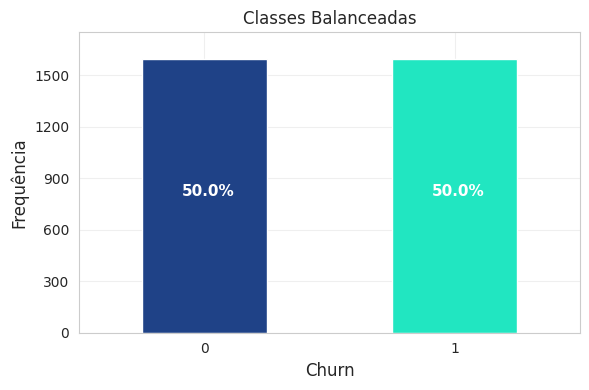

In [ ]:
fig, ax = plt.subplots(figsize = (6, 4))

count_rus.plot(kind = 'bar', rot = 0, color = colors)

ax.set_yticks([0, 300, 600, 900, 1200, 1500])
ax.grid(alpha = .3)
ax.set_ylim(0, 1.75e3)
ax.set_title('Classes Balanceadas')
ax.set_xlabel('Churn', fontsize = 12)
ax.set_ylabel('Frequência', fontsize = 12)

for p in ax.patches:

  width, height = p.get_width(), p.get_height()
  x, y = p.get_xy()

  ax.annotate('{:.1f}%'.format(height * 100 / count_rus.sum()), (x + .32 * width, y + height/2), color = 'white', fontweight = 'bold', fontsize = 11)

fig.tight_layout()
fig.show()

#### Modelo baseline para comparação de desempenhos

Para podermos ter uma base de comparação dos desempenhos dos diferentes modelos que serão testados, iremos construir um baseline simples. Um modelo _baseline_ serve como ponto de referência para medir a performance de modelos mais complexos. Ele estabelece um nível de performance mínimo que os modelos devem ter, visto que se trata da pontuação de um modelo sem otimização alguma.

Abaixo, vamos criar uma função que utiliza dos dados de treino e de um classificador para calcular a média das pontuações de _recall_ obtidas através de **validação cruzada**.

Os dados de treino utilizados estão desbalanceados e não-padronizados, apenas com a codificação das variáveis categóricas.

In [ ]:
def eval_model(X, y, clf, report = True, std = True):

  if std == True:

# X: DataFrame, variáveis independentes
# y: Series, variável-alvo
# clf: modelo de classificador
# report: bool, indica se a função deve imprimir ou não os resultados

    pipeline = make_pipeline(StandardScaler(), # Criar a pipeline com um passo de pré-processamento e com o modelo
                             clf)

    scores = cross_val_score(pipeline, X, y, scoring = 'recall', cv = 5) # Realizar validação cruzada com 5 dobras

    if report == True:
      print(f'Recall {scores.mean():.2f} (+/- {scores.std():.2f})') # Imprimir resultado da média do recall

    return scores.mean() # Retorna a média dos scores da validação cruzada

  else:

    model = clf.fit(X, y)

    scores = cross_val_score(model, X, y, scoring = 'recall', cv = 5) # Realizar validação cruzada com 5 dobras

    if report == True:
      print(f'Recall {scores.mean():.2f} (+/- {scores.std():.2f})') # Imprimir resultado da média do recall

    return scores.mean() # Retorna a média dos scores da validação cruzada

Para esse teste, utilizarei como modelo-base o `RandomForestClassifier` sobre os dados de treino, sem nenhuma alteração de parâmetros.

In [ ]:
rf = RandomForestClassifier()

print('Performance do modelo de baseline')
score_baseline = eval_model(X_train, y_train, rf)

Performance do modelo de baseline
Recall 0.49 (+/- 0.02)


### Teste de desempenho de vários modelos

A seguir, iremos realizar um teste de desempenho de vários modelos de classificação, buscando aquele que melhor performa na predição de casos de rotatividade de clientes.

Dentre os modelos, iremos testar os seguintes:

- SVC (Support Vector Classifier): classificador de vetores de suporte, algoritmo de aprendizado supervisionado;
- SGDC (_Stochastic Gradient Descent Classifier_): algoritmo de classificação linear para datasets grandes, baseado na técnica de gradiente descendente;
- DTC (_Decision Tree Classifier_) - algoritmo de aprendizado supervisionado não-paramétrico para prever as classes através de regras de decisão;
- _Logistic Regression_ - algoritmo de aprendizado supervisionado para classificação binária ou multi-classe, baseado em modelo estatístico;
- XGBC (_XGBoost Classifier_) - algoritmo de impulsionamento de gradiente otimizado;
- _Random Forest Classifier_ - classificador de floresta aleatória, um método de aprendizagem conjunta que combina múltiplas árvores de decisão para melhorar a classificação;
- _LGBM Classifier_ (_Light Gradient Boosting Machine Classifier_) - uma estrutura de impulsionamento de gradiente voltado para alta performance e eficiência em datasets grandes.

In [ ]:
# Instanciar os modelos
svc = SVC()
sgdc = SGDClassifier()
dtc = DecisionTreeClassifier()
lr = LogisticRegression()
xgbc = XGBClassifier()
rf = RandomForestClassifier()
lgbm = LGBMClassifier()

# Inicializar listas vazias para armazenar scores de recall e os nomes dos respectivos modelos
recall = []
model = []

# Armazenar os modelos numa lista
models = [svc, sgdc, dtc, lr, xgbc, rf, lgbm]

for clf in models:
  model.append(clf.__class__.__name__) # Armazenar os nomes dos modelos em model
  recall.append(eval_model(X_rus, y_rus, clf, report = False, std = False)) # Armazenar os valores das médias de validação cruzada para cada modelo em recall

# Armazenar os resultados em um DataFrame
pd.DataFrame(data = recall, index = model, columns = ['Recall']).sort_values(by = 'Recall', ascending = False)

,Recall
LogisticRegression,0.792741
SVC,0.785225
LGBMClassifier,0.777716
SGDClassifier,0.772094
RandomForestClassifier,0.765184
XGBClassifier,0.750172
DecisionTreeClassifier,0.673133


A tabela acima mostra a média das pontuações de _recall_ para os modelos de classificadores. O _recall_ foi escolhido porque ele mostra a **proporção de positivos classificados corretamente com relação ao total de positivos**. Como queremos minimizar a rotatividade, queremos um modelo que tenha o maior _recall_, isto é, a maior taxa de verdadeiros positivos e a menor taxa de falsos negativos.

Dessa análise, vemos que o Classificador de Vetor de Suporte (SVC) e a Regressão Logística são os modelos que apresentam maior _recall_. Queremos trabalhar com algoritmos que permitam maior manipulação de hiperparâmetros para melhora da performance. Por esse motivo, neste projeto foram testados os algoritmos de otimização _SGDClassifier_ e os modelos de boost por gradiente baseados em árvores de decisão, i.e, _LGBMClassifier_ e _XGBoost Classifier_.

O _SGDClassifier_ é um classificador linear otimizado com a técnica de gradiente descendente estocástico (SGD). Ele tem como objetivo minimizar a função de perda de modelos de classificação linear, como Regressão Logística e SVC. Justamente por trabalhar com esse método de otimização, ele é uma escolha melhor para problemas de larga escala, em _datasets_ maiores.

A busca por hiperparâmetros foi feita utilizando o _GridSearchCV_, que combina a técnica de validação cruzada para retornar medidas de desempenho mais precisas, realizadas sobre dobras de treino e validação balanceadas e randomizadas. Isto traz maior consistência ao teste dos modelos e sua posterior avaliação.

## Otimização de Hiperparâmetros

A construção de modelos de Machine Learning nunca de apoia em apenas um algoritmo. O processo envolve a escolha de uma série de algoritmos que de alguma forma se relacionam com o problema fornecendo uma solução. A partir da avaliação do desempenho de cada modelo, segundo uma métrica específica, escolhemos aquele mais adequado a lidar com o problema.

Com o modelo mais adequado definido, é possível melhorar ainda mais sua performance aplicando métodos que o testam sob diversas configurações de hiperparâmetros, selecionando aqueles que resultarem na melhor performance. Disto se trata a otimização de hiperparâmetros nesta seção.

### SGDClassifier

In [ ]:
# Instanciar o SGD Classifier padrão
sgdc = SGDClassifier(learning_rate = 'optimal')

Para o modelo de classificador baseado em otimização SGD, iremos manipular os hiperparâmetros _alpha_, _loss_, _penalty_, _learning_rate_ e _max_iter._

**Sobre os parâmetros:**

- _alpha_: representa a força da regularização, ou o inverso do parâmetro de regularização C.

- _learning_rate_: parâmetro que determina a taxa de aprendizado do algoritmo de gradiente descendente para convergência mais rápida. Nesse caso, está fixado como _'optimal'_, significando que a taxa de aprendizado irá se ajustar automaticamente baseada nas caracaterísticas do problema e o progresso do modelo durante o treinamento.

- _penalty_: determina o tipo de regularização que será aplicada. A penalidade _'l1'_ corresponde à regularização _Lasso_, a _'l2'_ à _ridge_ e a _'elasticnet'_ a uma combinação das duas primeiras.

- _loss_: especifica a função de perda a ser otimizada durante o treinamento. _'hinge'_ é a função de perda usada em classificadores lineares baseados em máquinas de vetores de suporte, como SVC.

- _max_iter_: determina o máximo de iterações realizadas pelo algoritmo em todo o _dataset_ durante o treino.


- **Alpha**

In [ ]:
sgdc = SGDClassifier(learning_rate = 'optimal')

sgdc_grid = [
             {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
            ]

# Estabelecer número de dobras randomizadas com as mesmas proporções de classes
kfold = KFold(n_splits = 5, shuffle = True)
# Instanciar o objeto GridSearchCV
grid = GridSearchCV(sgdc, sgdc_grid, scoring = 'recall', cv = kfold, n_jobs = -1)
# Realizar a busca por hiperparâmetros nas variáveis de treino
grid_res = grid.fit(X_rus, y_rus)

# Imprimir melhores resultados
print(f'Melhor performance: {grid_res.best_score_:.3f}',
      f'\nHiperparâmetros: {grid_res.best_params_}', '\n')

Melhor performance: 0.832 
Hiperparâmetros: {'alpha': 1} 



- **Penalty**

In [ ]:
sgdc = SGDClassifier(learning_rate = 'optimal', alpha = 1)

sgdc_grid = [
             {'penalty': ['l1', 'l2', 'elasticnet']}
            ]

# Estabelecer número de dobras randomizadas com as mesmas proporções de classes
kfold = KFold(n_splits = 5, shuffle = True)
# Instanciar o objeto GridSearchCV
grid = GridSearchCV(sgdc, sgdc_grid, scoring = 'recall', cv = kfold, n_jobs = -1)
# Realizar a busca por hiperparâmetros nas variáveis de treino
grid_res = grid.fit(X_rus, y_rus)

# Imprimir melhores resultados
print(f'Melhor performance: {grid_res.best_score_:.3f}',
      f'\nHiperparâmetros: {grid_res.best_params_}', '\n')

Melhor performance: 0.827 
Hiperparâmetros: {'penalty': 'l2'} 



- **Loss**

In [ ]:
sgdc = SGDClassifier(learning_rate = 'optimal', alpha = 1, penalty = 'l2')

sgdc_grid = [
             {'loss': ['hinge', 'perceptron', 'modified_huber', 'log']}
            ]

# Estabelecer número de dobras randomizadas com as mesmas proporções de classes
kfold = KFold(n_splits = 5, shuffle = True)
# Instanciar o objeto GridSearchCV
grid = GridSearchCV(sgdc, sgdc_grid, scoring = 'recall', cv = kfold, n_jobs = -1)
# Realizar a busca por hiperparâmetros nas variáveis de treino
grid_res = grid.fit(X_rus, y_rus)

# Imprimir melhores resultados
print(f'Melhor performance: {grid_res.best_score_:.3f}',
      f'\nHiperparâmetros: {grid_res.best_params_}', '\n')

Melhor performance: 0.830 
Hiperparâmetros: {'loss': 'hinge'} 



- **Max_Iter**

In [ ]:
sgdc = SGDClassifier(learning_rate = 'optimal' , alpha = 1, penalty = 'l2', loss = 'hinge')

sgdc_grid = [
             {'max_iter': [200, 300, 500, 1000, 1500, 2000]}
            ]

# Estabelecer número de dobras randomizadas com as mesmas proporções de classes
kfold = KFold(n_splits = 5, shuffle = True)
# Instanciar o objeto GridSearchCV
grid = GridSearchCV(sgdc, sgdc_grid, scoring = 'recall', cv = kfold, n_jobs = -1)
# Realizar a busca por hiperparâmetros nas variáveis de treino
grid_res = grid.fit(X_rus, y_rus)

# Imprimir melhores resultados
print(f'Melhor performance: {grid_res.best_score_:.3f}',
      f'\nHiperparâmetros: {grid_res.best_params_}', '\n')

Melhor performance: 0.827 
Hiperparâmetros: {'max_iter': 200} 



#### Modelo SGDClassifier Final

In [ ]:
sgdc_final = SGDClassifier(learning_rate = 'optimal', alpha = 1,
                           penalty = 'l2', loss = 'hinge', max_iter = 200)

# Ajuste do modelo
sgdc_final.fit(X_rus, y_rus)

# Validação cruzada em 5 dobras e 10 repetições
kfold = RepeatedKFold()
scores = cross_validate(sgdc_final, X_rus, y_rus, scoring = ['recall', 'roc_auc'], cv = kfold)

# Imprimir resultados das métricas de recall e AUC
print('Performance SGD - Treino',
      '\nRecall: {:.3f}'.format(scores['test_recall'].mean()), '+/-', '{:.3f}'.format(scores['test_recall'].std()),
      '\nAUC: {:.3f}'.format(scores['test_roc_auc'].mean()), '+/-', '{:.3f}'.format(scores['test_roc_auc'].std()), '\n')

# Padronizar as variáveis contínuas no conjunto de teste
std = StandardScaler()
cols_to_std = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_test[cols_to_std] = std.fit_transform(X_test[cols_to_std])

# Realizar as previsóes
y_pred1 = sgdc_final.predict(X_test)

# Report de classificação
print('Performance SGD - Teste\n', classification_report(y_test, y_pred1))

# AUC
print(f'AUC: {roc_auc_score(y_test, y_pred1):.3f}')

Performance SGD - Treino 
Recall: 0.826 +/- 0.024 
AUC: 0.824 +/- 0.018 

Performance SGD - Teste
               precision    recall  f1-score   support

           0       0.91      0.67      0.77       785
           1       0.46      0.81      0.59       272

    accuracy                           0.71      1057
   macro avg       0.68      0.74      0.68      1057
weighted avg       0.79      0.71      0.72      1057

AUC: 0.739


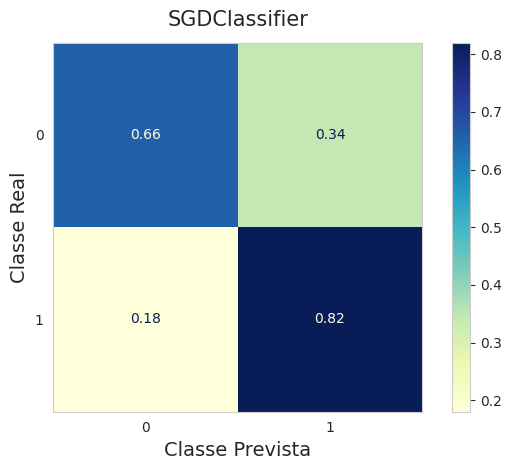

In [ ]:
fig, ax = plt.subplots()

cm = confusion_matrix(y_test, y_pred1, normalize = 'true')

display_cm = ConfusionMatrixDisplay(cm)

display_cm.plot(ax = ax, cmap = 'YlGnBu')

ax.grid(False)
ax.set_title('SGDClassifier', fontsize = 15, pad = 12)
ax.set_ylabel('Classe Real', fontsize = 14)
ax.set_xlabel('Classe Prevista', fontsize = 14)

fig.tight_layout()
fig.show()

### LightGBMClassifier

O LightGBM é baseado na técnica de boosting, na qual um conjunto de modelos fracos é combinado para formar um modelo forte. Uma de suas principais características é a eficiência e velocidade. Ele utiliza uma técnica chamada "leaf-wise growth" (crescimento por folhas) em vez da abordagem "level-wise growth" (crescimento por níveis) usada por outros algoritmos de boosting.

Esse modelo utiliza um algoritmo de otimização chamado Gradient-based One-Side Sampling (GOSS) para lidar com grandes conjuntos de dados. O GOSS seleciona amostras com base em seus gradientes, priorizando as amostras que são mais informativas e descartando as amostras menos relevantes. Assim, ele é capaz de lidar com conjuntos de dados grandes, tem boa capacidade de generalização e é resistente ao overfitting.

In [ ]:
# Instanciar o modelo padrão de LGBM
lgbm = LGBMClassifier(random_state = 100)

- **N_Estimators**

In [ ]:
lgbm_grid = [
    {'n_estimators': np.arange(50, 500, 50)}
]

# Estabelecer número de dobras randomizadas com as mesmas proporções de classes
kfold = KFold(n_splits = 5, shuffle = True)
# Instanciar o objeto GridSearchCV
grid = GridSearchCV(lgbm, lgbm_grid, scoring = 'recall', cv = kfold, n_jobs = -1)
# Realizar a busca por hiperparâmetros nas variáveis de treino
grid_res = grid.fit(X_rus, y_rus)

# Imprimir melhores resultados
print(f'Melhor performance: {grid_res.best_score_:.3f}',
      f'\nHiperparâmetros: {grid_res.best_params_}', '\n')

Melhor performance: 0.784 
Hiperparâmetros: {'n_estimators': 50} 



- **Learning_Rate e SubSample**

In [ ]:
lgbm = LGBMClassifier(random_state = 100, n_estimators = 50)

lgbm_grid = [
    {'learning_rate': [0.001, 0.01, 0.1, 1],
    'subsample': [0.7, 0.8, 0.9, 1.0]}
]

# Estabelecer número de dobras randomizadas com as mesmas proporções de classes
kfold = KFold(n_splits = 5, shuffle = True)
# Instanciar o objeto GridSearchCV
grid = GridSearchCV(lgbm, lgbm_grid, scoring = 'recall', cv = kfold, n_jobs = -1)
# Realizar a busca por hiperparâmetros nas variáveis de treino
grid_res = grid.fit(X_rus, y_rus)

# Imprimir melhores resultados
print(f'Melhor performance: {grid_res.best_score_:.3f}',
      f'\nHiperparâmetros: {grid_res.best_params_}', '\n')

Melhor performance: 0.776 
Hiperparâmetros: {'learning_rate': 0.1, 'subsample': 0.7} 



- **Min_Child_Samples, Min_Child_Weight e Max_Depth**

In [ ]:
lgbm = LGBMClassifier(random_state = 100, n_estimators = 50, learning_rate = 0.1, subsample = 0.7)

lgbm_grid = [
    {'min_child_samples': [1, 2, 4, 8, 10, 20, 40],
    'min_child_weight': [0.001, 0.01, 0.1, 1, 10],
    'max_depth': [5, 6, 7, 8, 9, 10]}
]

# Estabelecer número de dobras randomizadas com as mesmas proporções de classes
kfold = KFold(n_splits = 5, shuffle = True)
# Instanciar o objeto GridSearchCV
grid = GridSearchCV(lgbm, lgbm_grid, scoring = 'recall', cv = kfold, n_jobs = -1)
# Realizar a busca por hiperparâmetros nas variáveis de treino
grid_res = grid.fit(X_rus, y_rus)

# Imprimir melhores resultados
print(f'Melhor performance: {grid_res.best_score_:.3f}',
      f'\nHiperparâmetros: {grid_res.best_params_}', '\n')

Melhor performance: 0.797 
Hiperparâmetros: {'max_depth': 5, 'min_child_samples': 1, 'min_child_weight': 0.1} 



#### Modelo LightGBM Final

In [ ]:
# Modelo final de LightGBM
lgbm_final = LGBMClassifier(random_state = 100, n_estimators = 50, learning_rate = 0.01,
                            subsample = 0.7, min_child_samples = 1, min_child_weight = 0.001, max_depth = 5)

# Ajustar o modelo
lgbm_final.fit(X_rus, y_rus)

# # Validação cruzada em 5 dobras e 10 repetições
kfold = RepeatedKFold()
scores = cross_validate(lgbm_final, X_rus, y_rus, scoring = ['recall', 'roc_auc'], cv = kfold)

# Imprimir resultados das métricas de recall e AUC
print('Performance LightGBM - Treino',
      '\nRecall: {:.3f}'.format(scores['test_recall'].mean()), '+/-', '{:.3f}'.format(scores['test_recall'].std()),
      '\nAUC: {:.3f}'.format(scores['test_roc_auc'].mean()), '+/-', '{:.3f}'.format(scores['test_roc_auc'].std()), '\n')

# Fazer as previsões
y_pred2 = lgbm_final.predict(X_test)

# Report de classificação
print('Performance LightGBM - Teste\n', classification_report(y_test, y_pred2))

# AUC
print(f'AUC: {roc_auc_score(y_test, y_pred2):.3f}')

Performance LightGBM - Treino 
Recall: 0.782 +/- 0.027 
AUC: 0.824 +/- 0.016 

Performance LightGBM - Teste
               precision    recall  f1-score   support

           0       0.91      0.74      0.82       785
           1       0.51      0.79      0.62       272

    accuracy                           0.75      1057
   macro avg       0.71      0.76      0.72      1057
weighted avg       0.81      0.75      0.77      1057

AUC: 0.764


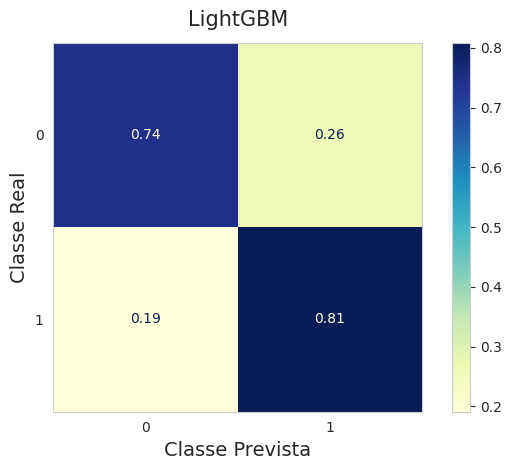

In [ ]:
fig, ax = plt.subplots()

cm = confusion_matrix(y_test, y_pred2, normalize = 'true')

display = ConfusionMatrixDisplay(cm)

display.plot(ax = ax, cmap = 'YlGnBu')

ax.grid(False)
ax.set_title('LightGBM', fontsize = 15, pad = 12)
ax.set_ylabel('Classe Real', fontsize = 14)
ax.set_xlabel('Classe Prevista', fontsize = 14)

fig.tight_layout()
fig.show()

### XGBClassifier

O XGBoost utiliza uma abordagem de boosting chamada Gradient Boosting, que treina os modelos de forma iterativa, corrigindo os erros cometidos pelos modelos anteriores. Ele se destaca por sua capacidade de lidar com conjuntos de dados complexos e de grande escala.

Diferentemente do LightGBM, ele utiliza a técnica de "crescimento por níveis" para construir árvores de decisão durante o treinamento. Também inclui recursos como regularização, que ajuda a evitar o overfitting e melhora a generalização do modelo.

In [ ]:
# Instanciar o modelo
xgb = XGBClassifier(learning_rate = 0.1)

- **N_Estimators**

In [ ]:
xgb_grid = [
            {'n_estimators': np.arange(50, 500, 50)}
           ]

# Estabelecer número de dobras randomizadas com as mesmas proporções de classes
kfold = KFold(n_splits = 5, shuffle = True)
# Instanciar o objeto GridSearchCV
grid = GridSearchCV(xgb, xgb_grid, scoring = 'recall', cv = kfold, n_jobs = -1)
# Realizar a busca por hiperparâmetros nas variáveis de treino
grid_res = grid.fit(X_rus, y_rus)

# Imprimir melhores resultados
print(f'Melhor performance: {grid_res.best_score_:.3f}',
      f'\nHiperparâmetros: {grid_res.best_params_}', '\n')

Melhor performance: 0.785 
Hiperparâmetros: {'n_estimators': 50} 



- **Max_Depth e Min_Child_Weight**

In [ ]:
xgb = XGBClassifier(learning_rate = 0.1, n_estimators = 50)

xgb_grid = [
    {'max_depth': np.arange(1, 8, 1),
    'min_child_weight': np.arange(1, 5, 1)}
]

# Crie n dobras e repete o processo com uma diferente randomização dos dados n vezes
kfold = KFold(n_splits = 5, shuffle = True)
# Instanciar o objeto GridSearchCV
grid = GridSearchCV(xgb, xgb_grid, scoring = 'recall', cv = kfold, n_jobs = -1)
# Realizar a busca por hiperparâmetros nas variáveis de treino
grid_res = grid.fit(X_rus, y_rus)

# Imprimir melhores resultados
print(f'Melhor performance: {grid_res.best_score_:.3f}',
      f'\nHiperparâmetros: {grid_res.best_params_}', '\n')

Melhor performance: 0.819 
Hiperparâmetros: {'max_depth': 1, 'min_child_weight': 1} 



- **Gamma**

In [ ]:
xgb = XGBClassifier(learning_rate = 0.1, n_estimators = 50, max_depth = 1, min_child_weight = 1)

xgb_grid = [
   {'gamma': [i / 10.0 for i in np.arange(0, 5)]}
]

# Crie n dobras e repete o processo com uma diferente randomização dos dados n vezes
kfold = KFold(n_splits = 5, shuffle = True)
# Instanciar o objeto GridSearchCV
grid = GridSearchCV(xgb, xgb_grid, scoring = 'recall', cv = kfold, n_jobs = -1)
# Realizar a busca por hiperparâmetros nas variáveis de treino
grid_res = grid.fit(X_rus, y_rus)

# Imprimir melhores resultados
print(f'Melhor performance: {grid_res.best_score_:.3f}',
      f'\nHiperparâmetros: {grid_res.best_params_}', '\n')

Melhor performance: 0.815 
Hiperparâmetros: {'gamma': 0.0} 



- **Learning_Rate**

In [ ]:
xgb = XGBClassifier(n_estimators = 50, max_depth = 1, min_child_weight = 1, gamma = 0.0)

xgb_grid = [
   {'learning_rate': [0.001, 0.01, 0.1, 1]}
]

# Estabelecer número de dobras randomizadas com as mesmas proporções de classes
kfold = KFold(n_splits = 5, shuffle = True)
# Instanciar o objeto GridSearchCV
grid = GridSearchCV(xgb, xgb_grid, scoring = 'recall', cv = kfold, n_jobs = -1)
# Realizar a busca por hiperparâmetros nas variáveis de treino
grid_res = grid.fit(X_rus, y_rus)

# Imprimir melhores resultados
print(f'Melhor performance: {grid_res.best_score_:.3f}',
      f'\nHiperparâmetros: {grid_res.best_params_}', '\n')

Melhor performance: 0.890 
Hiperparâmetros: {'learning_rate': 0.001} 



#### Modelo XGBoost Classifier Final

In [ ]:
xgb_final = XGBClassifier(learning_rate = 0.001,
                          n_estimators = 50, max_depth = 1, min_child_weight = 1, gamma = 0.0)

# Realizar o ajuste do modelo final
xgb_final.fit(X_rus, y_rus)

# # Validação cruzada em 5 dobras e 10 repetições
kfold = RepeatedKFold()
scores = cross_validate(xgb_final, X_rus, y_rus, scoring = ['recall', 'roc_auc'], cv = kfold)

# Imprimir resultados das métricas de recall e AUC
print('Performance XGB - Treino',
      '\nRecall: {:.3f}'.format(scores['test_recall'].mean()), '+/-', '{:.3f}'.format(scores['test_recall'].std()),
      '\nAUC: {:.3f}'.format(scores['test_roc_auc'].mean()), '+/-', '{:.3f}'.format(scores['test_roc_auc'].std()), '\n')

# Realizar previsões no conjunto de testes
y_pred3 = xgb_final.predict(X_test)

# Report de classificação
print('Performance XGB - Teste\n',classification_report(y_test, y_pred3))

# AUC
print(f'AUC: {roc_auc_score(y_test, y_pred3):.3f}')

Performance XGB - Treino 
Recall: 0.890 +/- 0.015 
AUC: 0.723 +/- 0.011 

Performance XGB - Teste
               precision    recall  f1-score   support

           0       0.92      0.58      0.71       785
           1       0.41      0.86      0.56       272

    accuracy                           0.65      1057
   macro avg       0.67      0.72      0.64      1057
weighted avg       0.79      0.65      0.67      1057

AUC: 0.719


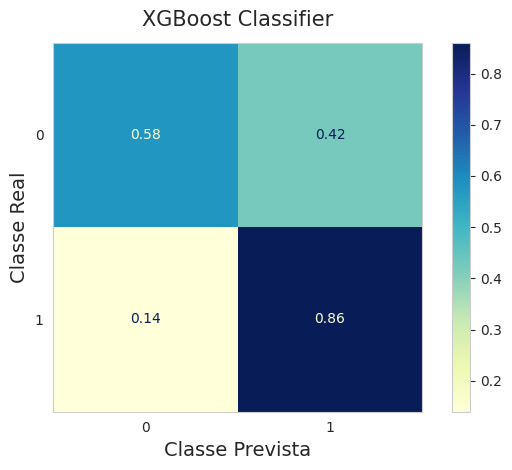

In [ ]:
fig, ax = plt.subplots()

cm = confusion_matrix(y_test, y_pred3, normalize = 'true')

display = ConfusionMatrixDisplay(cm)

display.plot(ax = ax, cmap = 'YlGnBu')

ax.grid(False)
ax.set_title('XGBoost Classifier', fontsize = 15, pad = 12)
ax.set_ylabel('Classe Real', fontsize = 14)
ax.set_xlabel('Classe Prevista', fontsize = 14)

fig.tight_layout()
fig.show()

- Dentre todos os modelos, o **XGBoost Classifier** foi o que apresentou maior aumento da métrica de _recall_ mediante a otimização de hiperparâmetros, partindo de  aproximadamente 0,75 para valores maiores que 0,86.

- A taxa de falsos positivos, porém, foi mais alta. A empresa pode ponderar sobre esse _trade-off_, uma vez que os clientes classificados como _Churn_ receberão mais atenção para não saírem da empresa. Isto tem um custo para a empresa, e também para os clientes que não querem ser importunados desnecessariamente.

### Estatísticas de Desempenho dos Modelos

Devido à natureza estocástica dos algoritmos de Machine Learning utilizados, podemos esperar que cada treinamento realizado com o mesmo _dataset_ resulte em diferentes resultados para as métricas observadas.

Para minimizar as incertezas e providenciar um intervalo de performance que represente robustamente os modelos, foram feitas várias repetições durante o treinamento e teste dos algoritmos, com diferentes configurações de hiperparâmetros e mantendo-se os mesmos procedimentos de pré-processamento do _dataset_. A intenção é de capturar a variabilidade que ocorre naturalmente devido a randomização presente tanto nos dados quanto nos algoritmos.

Primeiramente, com os hiperparâmetros mais recorrentes fixados após o GridSearchCV, e utilizando o `RepeatedKFold()`, foi realizada validação cruzada sobre os dados de treino. Deste modo, obtivemos um sumário estatístico da métrica de _recall_:

- SGD Classifier:
  
  - _recall_: $ 0.826 \pm 0.018  $

- LightGBM Classifier:
  
  - _recall_: $ 0.784 \pm 0.022  $

- XGBoost Classifier:
  - _recall_:$ 0.890 \pm 0.014 $

Em seguida, foram realizadas 10 repetições manualmente com os dados de teste, mas dessa vez alterando os hiperparâmetros a cada vez que se realizava o GridSearchCV. Deste modo, obtivemos uma estimativa mais segura da previsão de rotatividade, com intervalos para a métrica _recall_ de cada modelo.

- SGD Classifier:
  - _recall_: $ 0.835 \pm 0.019 $
- LightGBM Classifier:
  - _recall_: $ 0.793 \pm 0.019 $
- XGBoost Classifier:
  - _recall_: $ 0.883 \pm 0.022 $

Estes valores capturam o quanto o modelo pode variar, como função da mudança de alguns hiperparâmetros e de dados novos. Temos, portanto, resultados mais confiáveis considerando-se a natureza estocástica dos algoritmos que suportam os modelos.

Nota-se que em ambas as condições os resultados são parecidos e estão dentro do intervalo definido pelo desvio-padrão.

Cada um dos três modelos de previsão de rotatividade podem ser utilizados para diferentes objetivos, se adequando às circunstâncias impostas pelo problema de negócio em questão.

## Escolha do Modelo Adequado

- O SGD Classifier apresentou uma performance equilibrada, providenciando uma boa previsão na rotatividade, com uma taxa de Falsos Negativos de aproximadamente 16% e uma taxa de Falsos Positivos entre 30 e 35%.

- O LightGBM não performa tão bem quanto os outros dois na previsão de rotatividade, com uma taxa de Falsos Negativos de aproximadamente 20%. Porém, ele é melhor na distinção correta das classes, com o maior AUC dentre todos os modelos. Isso torna sua taxa de FP a menor dentre os três. Se a empresa tem a maior preocupação em não incomodar clientes já fidelizados com estratégias anti-Churn, então este é o modelo mais indicado.

- Por fim, o XGBoost apresenta a melhor previsão de rotatividade dos modelos, com um _recall_ médio de 0,88 nos testes. Isso significa que se a maior fonte de perdas de lucro da empresa for realmente do Churn, e ela não se importar em oferecer estratégias anti-Churn para cliente fiéis, então este é o modelo mais correto. Isto porque ele é mais assertivo na detecção de _Churn_, com uma baixa taxa de FN, mas uma alta taxa de FP em contrapartida.


## Conclusão

Este projeto buscou conhecer melhor os motivos para as taxas de rotatividade em uma empresa de telecomunicações, utilizando-se de dados históricos de seus clientes.

O Churn é fonte de muita preocupação para empresas dos mais diversos nichos, desde entretenimento até prestações de serviços, pois se relaciona diretamente com a perda de lucro devido à saída de clientes.

Por este motivo, é relevante utilizar dos dados para ter uma consciência situacional maior dos motivos por trás da saída de um cliente. Com a construção de modelos de Machine Learning através de dados históricos, a empresa é capaz de identificar os perfis dos clientes mais propensos à rotatividade e, a partir disso, tomar iniciativas voltadas para mantê-los e fidelizá-los.

A análise exploratória de dados, juntamente com a visualização, destacou os atributos mais informativos, providenciando _insights_ e jogando luz na correlação entre as variáveis.

O pré-processamento foi necessário para codificar as muitas variáveis categóricas presentes no _dataset_, preparando-as para que os algoritmos de Machine Learning tenham uma melhor performance. O balanceamento dos dados foi realizado utilizando a técnica de _RandomUnderSampling_, igualando as proporções entre as classes.

Na construção dos modelos, foram testadas várias alternativas a partir de uma performance de baseline para a métrica _recall_. Três modelos foram escolhidos para otimização, segundo a capacidade de manipulação de seus hiperparâmetros e os objetivos do projeto. Devido a natureza estocástica dos algoritmos, fez-se necessário um cuidado estatístico com relação aos resultados decorrentes de cada treinamento, considerando cada configuração de hiperparâmetros através do GridSearchCV. Utilizou-se de cálculos estatísticos e da técnica de validação cruzada.

Tanto no treinamento quanto nos testes, as repetições asseguraram que os modelos apresentassem valores para a métrica de _recall_ dentro de um intervalo confiável, garantindo mais robustez de resultados e clareza de escolha.

Os três modelos preveem a rotatividade de maneira eficiente, porém com diferenças que podem ser proveitosas segundo as circunstâncias específicas da empresa e do problema de negócios. O **SGD Classifier** possui uma performance equilibrada, com uma boa previsão de rotatividade, e uma taxa razoável de Falsos Negativos. O **LightGBM Classifier** é o menos capaz de prever a rotatividade, com uma taxa de Falsos Negativos de aproximadamente 20%. Porém, ele é o melhor na distinção de classes e sua taxa de Falsos Positivos é a mais baixa. Por último, o **XGBoost Classifier** é o melhor modelo para previsão de rotatividade, com uma taxa de quase 90%. Contudo, é o que pior performa na taxa de Falsos Positivos.

Cada um dos modelos possui pós e contras que devem ser levados em conta ao considerar a implementação num problema de negócios. Porém, o projeto mostrou um grande potencial para, a partir de dados históricos, construir modelos que preveem a rotatividade eficientemente.